## 応用データ解析中間課題

学科: 航空宇宙工学科

学籍番号: 03220343

氏名: 秀島光樹

### 課題内容

本課題では添付のデータを使用してもよいし、各自で用意したデータを使用してもよい。

ただし各自のデータを使用する場合は以下の条件を満たすこと。

* 標本数が 100 以上であること。

* 架空のデータでなく、実際の調査をもとに作成されたデータであること。（自分で調査し
ていなくてもよい。）

レポートの形式は自由とするが、PDF 形式で提出すること。（Word で書いて PDF に変換
しても良いし、Jupyter notebook などを使用して計算結果と一緒に考察を書いても良いが、
最終的に PDF にすること。）

なおプログラムと実行結果しか記載していないレポートは原点対象になる。必ず文章で説
明と考察を記載すること。

添付のデータはボストン市の住宅価格とそれに関係するデータである。変数の意味は次
のとおりである。（出典：カーネギーメロン大 http://lib.stat.cmu.edu/datasets/boston）
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000's

___

### 問１．
MEDV（または各自のデータ）について、以下の量を求めよ。また、これらの用語を
必要なだけ使って MEDV がどのような分布をしているか簡単に説明せよ。
・期待値 ・中央値 ・標本分散 ・不偏分散
・歪度 ・尖度

#### 回答
まず統計的諸量を求める

In [97]:
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pprint

In [69]:
df = pd.read_csv("BostonHousing .csv")

<Axes: >

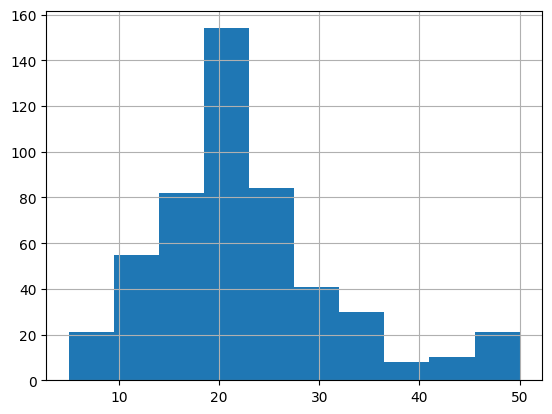

In [70]:
MEDV = df["MEDV"]
MEDV.hist()

In [71]:
static = MEDV.describe()
print(static)

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [72]:
print(f"期待値：{static.loc['mean']}")
print(f"中央値：{static.loc['50%']}")
print(f"標本分散：{np.var(MEDV, ddof=0)}")
print(f"不偏分散：{np.var(MEDV, ddof=1)}")
print(f"歪度：{stats.skew(MEDV)}")
print(f"尖度：{stats.kurtosis(MEDV)}")

期待値：22.532806324110677
中央値：21.2
標本分散：84.41955615616556
不偏分散：84.58672359409856
歪度：1.104810822864635
尖度：1.4686287722747462


以上からMEDVの分布について以下のことが言える

* 歪度が正であることから正規分布度比べて左に偏っていることがわかる。

* 中央値が期待値に比べ小さいことからも、期待値と中央値が同じ値となる正規分布に比べて分布が左に偏っていることがわかる。

* また尖度が正であることから、正規分布と比べ、山なりに尖って分布していることがわかる。



____

### 問２．
MEDV（または各自のデータ）と相関が強い変数と弱い変数を調べ、MEDV との因
果関係の有無を推測して簡単に述べよ。（例：税金を多く収める住民が住む地区は所得が高
い傾向にあるため住宅価格が高い傾向にある。）また、他にデータについて気づいた点があ
れば述べよ。

#### 回答
各変数について、MEDVとの相関係数を求める

In [73]:
for col in df.columns:
    if col == "MEDV":
        break
    print(f"{col}: {np.corrcoef(df[col], MEDV)[0][1]}")

CRIM: -0.3883046085868113
ZN: 0.36044534245054277
INDUS: -0.4837251600283727
CHAS: 0.17526017719029854
NOX: -0.42732077237328264
RM: 0.6953599470715395
AGE: -0.3769545650045963
DIS: 0.24992873408590388
RAD: -0.38162623063977763
TAX: -0.468535933567767
PTRATIO: -0.5077866855375617
B: 0.33346081965706653
LSTAT: -0.7376627261740147


以上のデータから、以下のことが言える

* 相関が強い変数
    * RM との相関係数が１に近い
        * 住宅の平均部屋数が多い地区は、部屋数が多いほど価格が高くなる傾向があるため
    * LSTAT
        * 人口あたりの地位が低い割合が高いほど、低収入の人が多くなるので、住宅価格が低くなっていると考えられる
* 相関が弱い変数
    * DIS
        * ５つのボストンの雇用センターまでの加重距離は住宅価格とはそれほど関係がない
        * 一番近い雇用センターとの距離は相関が強い可能性があるが、これは５つの雇用センターとの加重距離であるので、相関が弱いと考えられる
        

また、その他データについて以下のことが言える

In [74]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [111]:
strong_corr = {}
for col in df_corr.columns:
    for id in df_corr.index:
        if abs(df_corr[col][id]) > 0.75 and df_corr[col][id] < 1:
            # for key in strong_corr:
                # if not (col in key and id in key):
            strong_corr.setdefault(f"col: {col}, id: {id}", f"{df_corr[col][id]}")    
pprint.pprint(strong_corr)

{'col: DIS, id: NOX': '-0.7692301132258282',
 'col: INDUS, id: NOX': '0.7636514469209139',
 'col: NOX, id: DIS': '-0.7692301132258282',
 'col: NOX, id: INDUS': '0.7636514469209139',
 'col: RAD, id: TAX': '0.9102281885331865',
 'col: TAX, id: RAD': '0.9102281885331865'}


In [75]:
NOX_INDUS= df_corr["NOX"]["INDUS"]
print(f"NOXとINDUS:{NOX_INDUS}")

NOXとINDUS:0.7636514469209139


* NOXとINDUSの相関係数

上のように1に近く、相関が強いと言える。

町当たりの小売業メーカーの割合が高い地域で、工場の数が多くなるので、一酸化窒素の濃度も高くなるためと考えられる。


